In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print("X:",X), print("y: ",y)

X: [[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
y:  [146 158 172 187 196 210]


(None, None)

In [ ]:
digibank_logo

In [8]:
X.shape

(6, 3, 1)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [11]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 31305.8379
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 30946.6953
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 30575.8594
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 30191.7988
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 29798.4707
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 29394.9004
Epoch 7/300
1/1 [==============================] - 0s 21ms/step - loss: 28981.0684
Epoch 8/300
1/1 [==============================] - 0s 20ms/step - loss: 28557.6328
Epoch 9/300
1/1 [==============================] - 0s 26ms/step - loss: 28124.9316
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 27680.8613
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 27221.8594
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 26745.3887
Epoch

1/1 [==============================] - 0s 10ms/step - loss: 4.5138
Epoch 201/300
1/1 [==============================] - 0s 11ms/step - loss: 4.5296
Epoch 202/300
1/1 [==============================] - 0s 11ms/step - loss: 4.5175
Epoch 203/300
1/1 [==============================] - 0s 9ms/step - loss: 4.4872
Epoch 204/300
1/1 [==============================] - 0s 9ms/step - loss: 4.5074
Epoch 205/300
1/1 [==============================] - 0s 13ms/step - loss: 4.4604
Epoch 206/300
1/1 [==============================] - 0s 13ms/step - loss: 4.4768
Epoch 207/300
1/1 [==============================] - 0s 18ms/step - loss: 4.4461
Epoch 208/300
1/1 [==============================] - 0s 17ms/step - loss: 4.4378
Epoch 209/300
1/1 [==============================] - 0s 18ms/step - loss: 4.4319
Epoch 210/300
1/1 [==============================] - 0s 11ms/step - loss: 4.4030
Epoch 211/300
1/1 [==============================] - 0s 13ms/step - loss: 4.4086
Epoch 212/300
1/1 [=========================

### Predicting For the next 10 data

In [13]:
#  demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0

while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


[225.67062]
1 day input [196.         210.         225.67062378]
1 day output [[237.70465]]
2 day input [210.         225.67062378 237.70465088]
2 day output [[253.07307]]
3 day input [225.67062 237.70465 253.07307]
3 day output [[269.0501]]
4 day input [237.70465 253.07307 269.0501 ]
4 day output [[283.87946]]
5 day input [253.07307 269.0501  283.87946]
5 day output [[301.03137]]
6 day input [269.0501  283.87946 301.03137]
6 day output [[318.66864]]
7 day input [283.87946 301.03137 318.66864]
7 day output [[336.46567]]
8 day input [301.03137 318.66864 336.46567]
8 day output [[356.06372]]
9 day input [318.66864 336.46567 356.06372]
9 day output [[376.38354]]
[225.67062, 237.70465, 253.07307, 269.0501, 283.87946, 301.03137, 318.66864, 336.46567, 356.06372, 376.38354]


In [14]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [15]:
len(timeseries_data)

9

### Visualizaing The Output

In [17]:
import matplotlib.pyplot as plt

In [18]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

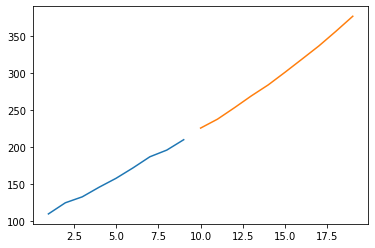

In [19]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)